In [91]:
#Import necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency

In [92]:
#Load and inspect csv files
observations_df = pd.read_csv('observations.csv')
species_df = pd.read_csv('species_info.csv')
display(observations_df.head())
print(observations_df.info())
display(species_df.head())
display(species_df.info())

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


None

In [95]:
#How many species are in the observations dataset? 
species_list = observations_df['scientific_name'].unique()
print('There are '+str(len(species_list))+' unique species in our observations.')
#How many parks are the observations from?
parks_list = observations_df['park_name'].unique()
print('There are '+str(len(parks_list))+' unique parks in our observations.')
print(parks_list)
#How many observations are from each park?
park_counts = observations_df['park_name'].value_counts()
print(park_counts)
#What categories do the species of the species dataset fall into?
categories = species_df['category'].unique()
print(categories)
#How many conservation statuses are there?
statuses = species_df['conservation_status'].unique()
print(statuses)


There are 5541 unique species in our observations.
There are 4 unique parks in our observations.
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
Yellowstone National Park              5824
Yosemite National Park                 5824
Great Smoky Mountains National Park    5824
Bryce National Park                    5824
Name: park_name, dtype: int64
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


Not Specified         5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64


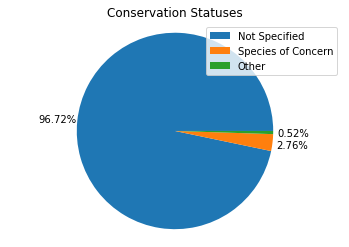

Other Percentages (Not Shown): 
 Endangered: 0.27%
 Threatened: 0.17%
 In Recovery: 0.07%


In [96]:
#Replace NaN values with something less ugly
species_df['conservation_status'] = species_df['conservation_status'].fillna('Not Specified')
statuses = species_df['conservation_status'].unique()
#Count the species falling into each status
species_counts = species_df['conservation_status'].value_counts()
print(species_counts)
#Create a pie chart of conservation statuses (Endangered, Threatened, and In Recovery condensed into "Other" for readability)
pie_labels = ['Not Specified', 'Species of Concern', 'Other']
other_num = len(species_df)-(species_counts[0] + species_counts[1])
pie_list = [species_counts[0], species_counts[1], other_num]
plt.pie(pie_list, autopct='%0.2f%%', pctdistance=1.2)
plt.legend(pie_labels)
plt.title('Conservation Statuses')
plt.axis('equal')
plt.show()
print('Other Percentages (Not Shown): \n Endangered: '+str(round(species_counts[2]*100/len(species_df), 2))+'%\n Threatened: '+str(round(species_counts[3]*100/len(species_df), 2))+'%\n In Recovery: '+str(round(species_counts[4]*100/len(species_df), 2))+'%')

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64


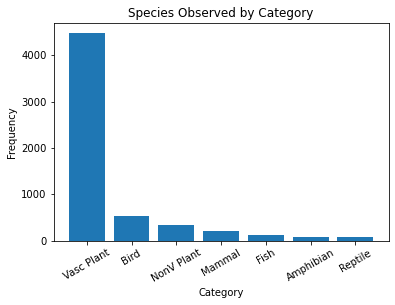

In [97]:
#Create a bar chart of species observed by category
category_counts = species_df['category'].value_counts()
print(category_counts)
bar_labels = ['Vasc Plant', 'Bird', 'NonV Plant', 'Mammal', 'Fish', 'Amphibian', 'Reptile'] #Labels abbreviated for readability
plt.bar(range(len(category_counts)), category_counts, tick_label=bar_labels)
plt.xticks(rotation=30)
plt.title('Species Observed by Category')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

In [99]:
#Create contingency tables, perform a chi-square test, and interpret the results
category_conservation = pd.crosstab(species_df['category'], species_df['conservation_status'])
print('Category vs. Conservation Status Contingency Table')
display(category_conservation)
chi2, p, dof, expected = chi2_contingency(category_conservation)
print('The p-value for a chi-square test conducted on this contingency table is '+str(p)+'.\nThis suggests a strong association between category and conservation status (signficance threshold: p=0.05)')

conservation_status,Endangered,In Recovery,Not Specified,Species of Concern,Threatened
category,,,,,
Amphibian,1,0,73,4,2
Bird,4,3,442,72,0
Fish,3,0,116,4,4
Mammal,7,1,176,28,2
Nonvascular Plant,0,0,328,5,0
Reptile,0,0,74,5,0
Vascular Plant,1,0,4424,43,2


The p-value for a chi-square test conducted on this contingency table is 2.4551423165990194e-117.
This suggests a strong association between category and conservation status (signficance threshold: p=0.05)


In [140]:
#What are the n most observed species for a given park?
def n_most_observed(park, n):
    park_values = observations_df[observations_df['park_name']==park]
    park_sorted = park_values.sort_values("observations", ascending=False).reset_index()
    park_merged = park_sorted.merge(species_df, how='inner', on='scientific_name')
    for i in range(n):
        print('The #'+str(i+1)+' most frequently observed species at '+park+' is '+park_merged['scientific_name'][i])
        print('Its other names are: '+park_merged['common_names'][i])
        print('It is a '+park_merged['category'][i]+' with a conservation status of '+park_merged['conservation_status'][i])
        print('It has been observed at this park '+str(park_merged['observations'][i])+' times.')
        print('\n')
        
#What are the n rarest species in a given park?
def n_least_observed(park, n):
    park_values = observations_df[observations_df['park_name']==park]
    park_sorted = park_values.sort_values("observations", ascending=False).reset_index()
    park_merged = park_sorted.merge(species_df, how='inner', on='scientific_name')
    for i in range(n):
        print('The #'+str(i+1)+' rarest species at '+park+' is '+park_merged['scientific_name'][len(park_merged)-(i+1)])
        print('Its other names are: '+park_merged['common_names'][len(park_merged)-(i+1)])
        print('It is a '+park_merged['category'][len(park_merged)-(i+1)]+' with a conservation status of '+park_merged['conservation_status'][len(park_merged)-(i+1)])
        print('It has been observed at this park '+str(park_merged['observations'][len(park_merged)-(i+1)])+' times.')
        print('\n')
        
n_most_observed('Great Smoky Mountains National Park', 3) #describe the 3 most common species in Smoky Mts. National Park
n_least_observed('Bryce National Park', 4) #describe the 2 rarest species in Bryce National Park



The #1 most frequently observed species at Great Smoky Mountains National Park is Sonchus asper ssp. asper
Its other names are: Spiny Sowthistle
It is a Vascular Plant with a conservation status of Not Specified
It has been observed at this park 147 times.


The #2 most frequently observed species at Great Smoky Mountains National Park is Lespedeza violacea
Its other names are: Violet Bush-Clover
It is a Vascular Plant with a conservation status of Not Specified
It has been observed at this park 146 times.


The #3 most frequently observed species at Great Smoky Mountains National Park is Botrychium dissectum
Its other names are: Cutleaf Grape-Fern, Cut-Leaved Grape Fern
It is a Vascular Plant with a conservation status of Not Specified
It has been observed at this park 144 times.


The #1 rarest species at Bryce National Park is Corydalis aurea
Its other names are: Golden Corydalis, Scrambled Eggs
It is a Vascular Plant with a conservation status of Not Specified
It has been observed 